**Diabetes  Prediction**

Importing the Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

Data Collection and Data Processing

In [ ]:
#loading the dataset to a pandas Dataframe

diabetes= pd.read_csv('/content/diabetes.csv')

diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and columns

diabetes.shape


(768, 9)

In [ ]:
 #describe --> statistical measures of the data

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Checking the No.of Zero values in dataset

print('No.of Zero values in Glucose',diabetes[diabetes['Glucose']==0].shape[0])

print('No.of Zero values in Blood Pressure',diabetes[diabetes['BloodPressure']==0].shape[0])

print('No.of Zero values in Skin Thickness',diabetes[diabetes['SkinThickness']==0].shape[0])

print('No.of Zero values in Insulin',diabetes[diabetes['Insulin']==0].shape[0])

print('No.of Zero values in BMI',diabetes[diabetes['BMI']==0].shape[0])

No.of Zero values in Glucose 5
No.of Zero values in Blood Pressure 35
No.of Zero values in Skin Thickness 227
No.of Zero values in Insulin 374
No.of Zero values in BMI 11


In [ ]:
#Replace N0.0f Zero values with mean of that columns

diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())

diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())

diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())

diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())

diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].mean())

In [ ]:
#describe --> statistical measures of the data after replacing the minimum value

diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Visualization**

Diabetes Negative (0) 500
Diabetes Positive (1) 268


Text(0.5, 1.0, 'Outcome Vs Count')

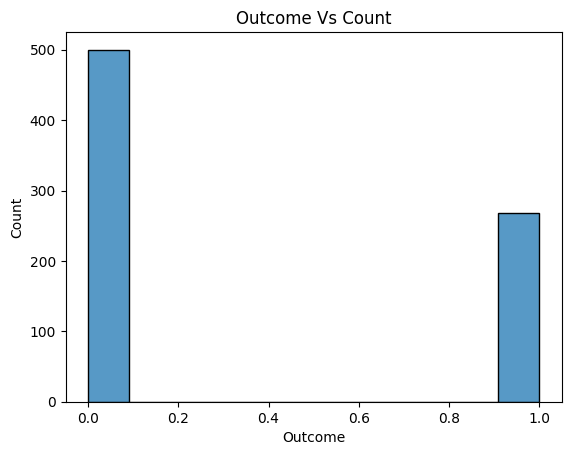

In [ ]:
#histplot

sns.histplot(diabetes['Outcome'])
N,P=diabetes['Outcome'].value_counts()
print('Diabetes Negative (0)',N)
print('Diabetes Positive (1)',P)
plt.title('Outcome Vs Count')

Text(0.5, 1.0, 'Outcome Vs Count')

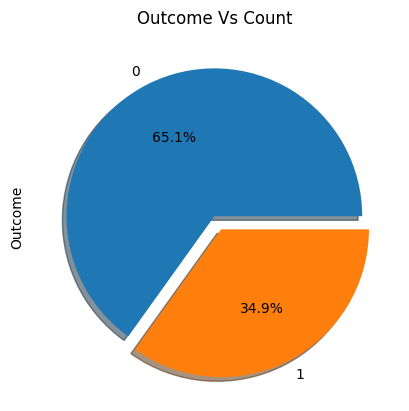

In [ ]:
#Pie CountPlot

diabetes['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Outcome Vs Count')

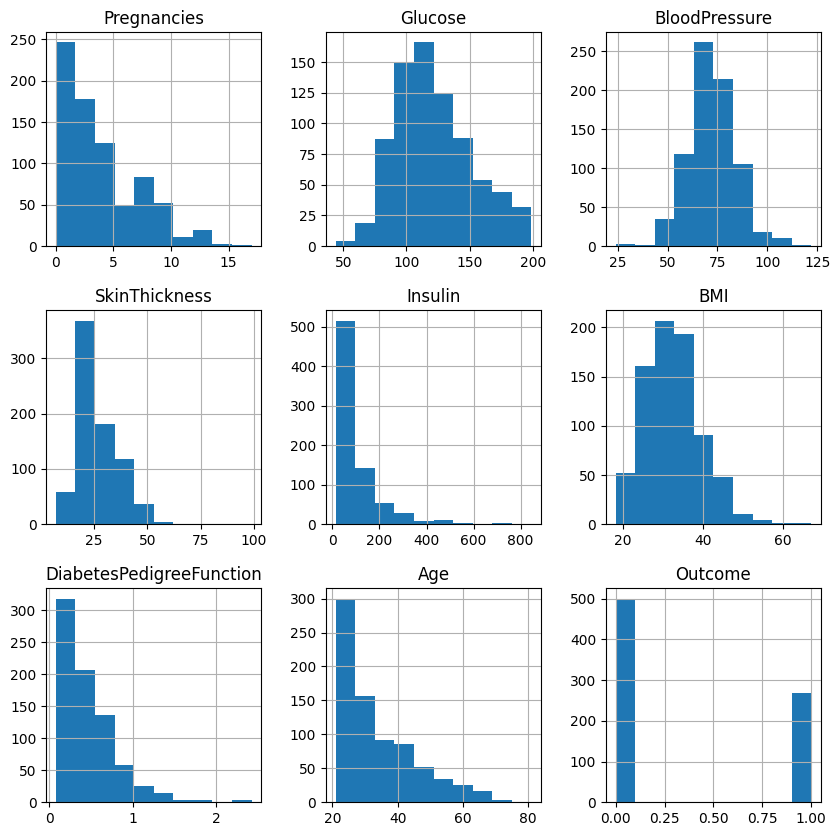

In [ ]:
#Histograms of each feauture

diabetes.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

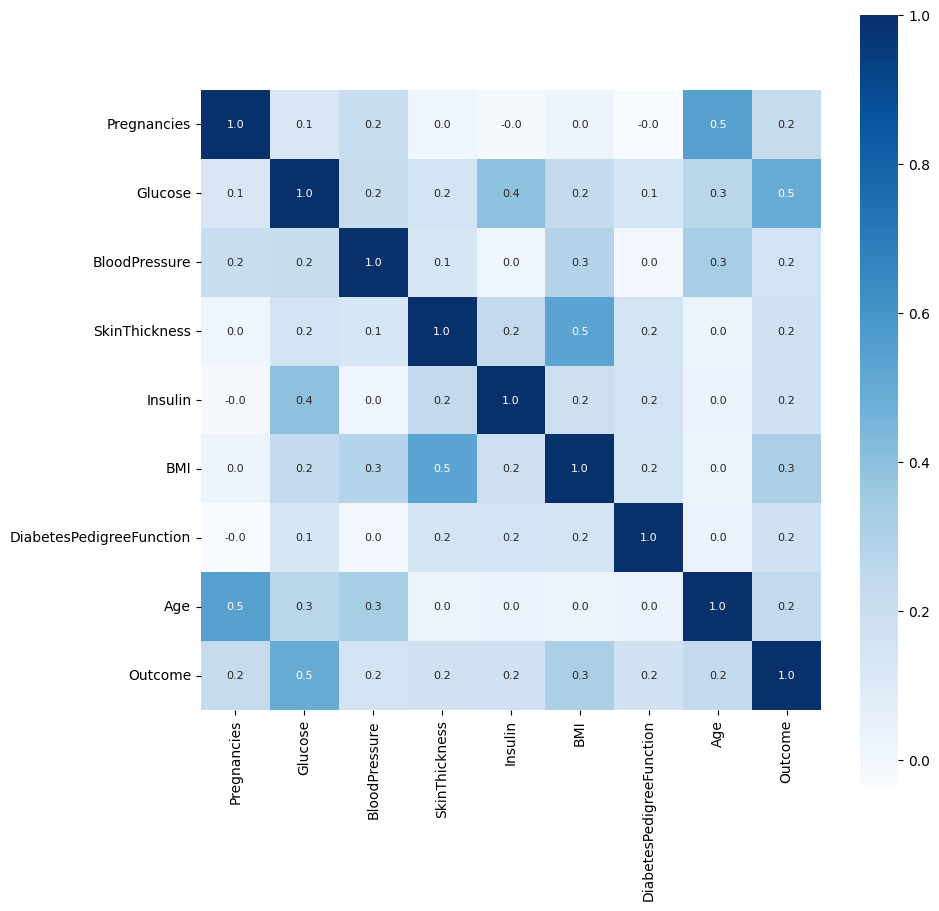

In [ ]:
#Heatmap

correlation = diabetes.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


Separating features and Target

In [ ]:
X=diabetes.drop(columns=['Outcome'], axis=1)
Y=diabetes['Outcome']
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [ ]:
#Apply Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X)
ssx=scaler.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ssx, Y, test_size=0.2,random_state = 7)
print(X.shape,Y.shape,X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(768, 8) (768,) (614, 8) (154, 8) (614,) (154,)


Model-1 Training

**K-Nearest Neighbour (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# loading the model

knn = KNeighborsClassifier(n_neighbors=7)

#Fitting the model with X_train,Y_train

knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

Evaluation on Prediction Data

In [ ]:
knn_ypre_train=knn.predict(X_train)
print(knn_ypre_train)

knn_ypre =knn.predict(X_test)
print(knn_ypre)

train_acc=np.mean(knn_ypre_train==Y_train)*100

print("Trainned Accuracy",train_acc)

test_acc=np.mean(knn_ypre==Y_test)*100

print("Tested Accuracy",test_acc)

[0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [ ]:
#Calculating Confusion Matrix

Confusion_matrix_knn=confusion_matrix(Y_test,knn_ypre)
print('Confusion matrix knn model is \n',Confusion_matrix_knn)

Confusion matrix knn model is 
 [[83 14]
 [24 33]]


(83, 14, 24, 33)

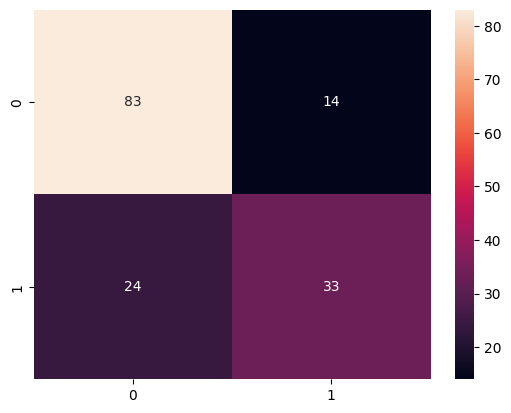

In [ ]:
sns.heatmap(Confusion_matrix_knn,annot=True,fmt="d")

TN=Confusion_matrix_knn[0,0]
FP=Confusion_matrix_knn[0,1]
FN=Confusion_matrix_knn[1,0]
TP=Confusion_matrix_knn[1,1]

TN,FP,FN,TP

In [ ]:
#Calculating Accuracy Score

Accuracy_score_knn=accuracy_score(Y_test,knn_ypre)*100

print("Accuracy Score of model knn is \n",Accuracy_score_knn)

Accuracy Score of model knn is 
 75.32467532467533


In [ ]:
#Calculating classification Report

f1_Score_knn=classification_report(Y_test,knn_ypre)

print("classification Report (f1 Score) of model knn is\n",f1_Score_knn)

classification Report (f1 Score) of model knn is
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        97
           1       0.70      0.58      0.63        57

    accuracy                           0.75       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Model-2 Training

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# loading the model

nb=GaussianNB()

#Fitting the model with X_train,Y_train

nb.fit(X_train,Y_train)



GaussianNB()

Evaluation on Prediction Data

In [ ]:
nb_ypre_train= nb.predict(X_train)
print(nb_ypre_train)

nb_ypre = nb.predict(X_test)
print(nb_ypre)

train_acc=np.mean(nb_ypre_train==Y_train)*100

print("Trainned Accuracy",train_acc)

test_acc=np.mean(nb_ypre==Y_test)*100

print("Tested Accuracy",test_acc)


[0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [ ]:
#Calculating Confusion Matrix

Confusion_matrix_nb=confusion_matrix(Y_test,nb_ypre)
print('Confusion matrix nb model is \n',Confusion_matrix_nb)

Confusion matrix nb model is 
 [[78 19]
 [21 36]]


(78, 19, 21, 36)

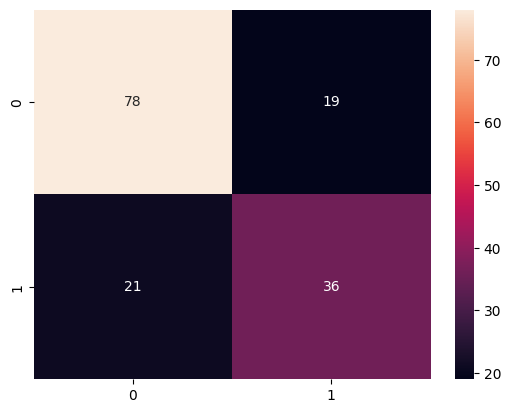

In [ ]:
sns.heatmap(Confusion_matrix_nb,annot=True,fmt="d")

TN=Confusion_matrix_nb[0,0]
FP=Confusion_matrix_nb[0,1]
FN=Confusion_matrix_nb[1,0]
TP=Confusion_matrix_nb[1,1]

TN,FP,FN,TP

In [ ]:
#Calculating Accuracy Score

Accuracy_score_nb=accuracy_score(Y_test,nb_ypre)*100

print("Accuracy Score of model nb is \n",Accuracy_score_nb)

Accuracy Score of model nb is 
 74.02597402597402


In [ ]:
#Calculating classification Report

f1_Score_nb=classification_report(Y_test,nb_ypre)

print("classification Report (f1 Score) of model nb is\n",f1_Score_nb)

classification Report (f1 Score) of model nb is
               precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.65      0.63      0.64        57

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



Model-3 Training

**Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC

# loading the model

svc=SVC()

#Fitting the model with X_train,Y_train

svc.fit(X_train,Y_train)

SVC()

Evaluation on Prediction Data

In [ ]:
svc_ypre_train=svc.predict(X_train)
print(svc_ypre_train)

svc_ypre =svc.predict(X_test)
print(svc_ypre)

train_acc=np.mean(svc_ypre_train==Y_train)*100

print("Trainned Accuracy",train_acc)

test_acc=np.mean(svc_ypre==Y_test)*100

print("Tested Accuracy",test_acc)

[0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 1 

In [ ]:
#Calculating Confusion Matrix

Confusion_matrix_svc=confusion_matrix(Y_test,svc_ypre)
print('Confusion matrix svc model is \n',Confusion_matrix_svc)

Confusion matrix svc model is 
 [[91  6]
 [20 37]]


(91, 6, 20, 37)

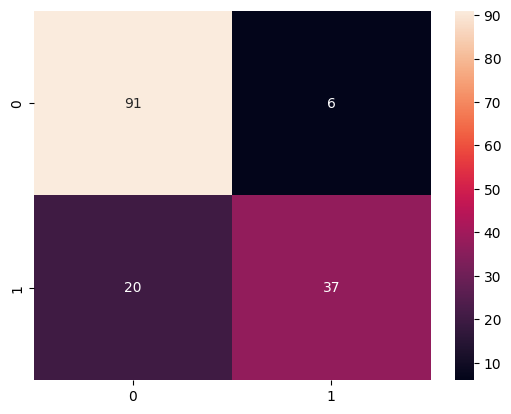

In [ ]:
sns.heatmap(Confusion_matrix_svc,annot=True,fmt="d")

TN=Confusion_matrix_svc[0,0]
FP=Confusion_matrix_svc[0,1]
FN=Confusion_matrix_svc[1,0]
TP=Confusion_matrix_svc[1,1]

TN,FP,FN,TP

In [ ]:
#Calculating Accuracy Score

Accuracy_score_svc=accuracy_score(Y_test,svc_ypre)*100

print("Accuracy Score of model svc is \n",Accuracy_score_svc)

Accuracy Score of model svc is 
 83.11688311688312


In [ ]:
#Calculating classification Report

f1_Score_svc=classification_report(Y_test,svc_ypre)

print("classification Report (f1 Score) of model svc is\n",f1_Score_svc)

classification Report (f1 Score) of model svc is
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        97
           1       0.86      0.65      0.74        57

    accuracy                           0.83       154
   macro avg       0.84      0.79      0.81       154
weighted avg       0.83      0.83      0.83       154



Model-4 Training

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# loading the model

# Random Forest with gini
  
# Creating the classifier object

rf_gini=RandomForestClassifier(criterion ="gini",
           max_depth=3,min_samples_leaf=5)
  
# Performing training

rf_gini.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
# loading the model

# Random Forest with entropy
  
# Creating the classifier object

rf_entropy=RandomForestClassifier(criterion ="entropy",
           max_depth=3,min_samples_leaf=5)
  
# Performing training

rf_entropy.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

Evaluation on Prediction Data

In [ ]:
rf_gini_ypre_train=rf_gini.predict(X_train)
print(rf_gini_ypre_train)

y_pred_g =rf_gini.predict(X_test)
print(y_pred_g)

train_acc=np.mean(rf_gini_ypre_train==Y_train)*100

print("Trainned Accuracy",train_acc)

test_acc=np.mean(y_pred_g==Y_test)*100

print("Tested Accuracy",test_acc)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [ ]:
# Predicton on test with entropy

y_pred_e=rf_entropy.predict(X_test)
print("Predicted values based on entropy:")
print(y_pred_e)

Predicted values based on entropy:
[0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0]


In [ ]:
rf_entropy_ypre_train=rf_entropy.predict(X_train)
print(rf_entropy_ypre_train)

y_pred_e =rf_entropy.predict(X_test)
print(y_pred_e)

train_acc=np.mean(rf_entropy_ypre_train==Y_train)*100

print("Trainned Accuracy",train_acc)

test_acc=np.mean(y_pred_e==Y_test)*100

print("Tested Accuracy",test_acc)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [ ]:
#Calculating Confusion Matrix based on gini-index

Confusion_matrix_rf_g=confusion_matrix(Y_test, y_pred_g)   
print("Confusion Matrix based on gini-index:\n",Confusion_matrix_rf_g)

#Calculating Accuracy Score based on gini-index
   
Accuracy_score_rf_g=accuracy_score(Y_test,y_pred_g)*100
print ("Accuracy score  based on gini-index:\n",Accuracy_score_rf_g)

#Calculating classification Report based on gini-index

f1_Score_rf_g=classification_report(Y_test,y_pred_g) 
print("f1 score Report  based on gini-index:\n",f1_Score_rf_g)

Confusion Matrix based on gini-index:
 [[91  6]
 [29 28]]
Accuracy score  based on gini-index:
 77.27272727272727
f1 score Report  based on gini-index:
               precision    recall  f1-score   support

           0       0.76      0.94      0.84        97
           1       0.82      0.49      0.62        57

    accuracy                           0.77       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.78      0.77      0.76       154



(91, 6, 29, 28)

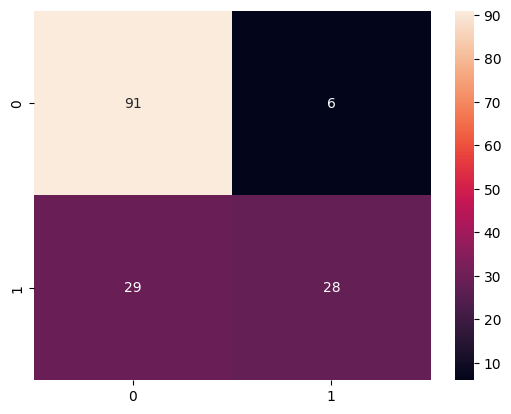

In [ ]:
sns.heatmap(Confusion_matrix_rf_g,annot=True,fmt="d")

TN=Confusion_matrix_rf_g[0,0]
FP=Confusion_matrix_rf_g[0,1]
FN=Confusion_matrix_rf_g[1,0]
TP=Confusion_matrix_rf_g[1,1]

TN,FP,FN,TP

In [ ]:
#Calculating Confusion Matrix based on entropy

Confusion_matrix_rf_e=confusion_matrix(Y_test, y_pred_e)   
print("Confusion Matrix based on  entropy:\n",Confusion_matrix_rf_e)

#Calculating Accuracy Score based on entropy
   
Accuracy_score_rf_e=accuracy_score(Y_test,y_pred_e)*100
print ("Accuracy score  based on  entropy:\n",Accuracy_score_rf_e)

#Calculating classification Report based on entropy

f1_Score_rf_e=classification_report(Y_test,y_pred_e) 
print("f1 score Report  based on  entropy:\n",f1_Score_rf_e)

Confusion Matrix based on  entropy:
 [[90  7]
 [29 28]]
Accuracy score  based on  entropy:
 76.62337662337663
f1 score Report  based on  entropy:
               precision    recall  f1-score   support

           0       0.76      0.93      0.83        97
           1       0.80      0.49      0.61        57

    accuracy                           0.77       154
   macro avg       0.78      0.71      0.72       154
weighted avg       0.77      0.77      0.75       154



(90, 7, 29, 28)

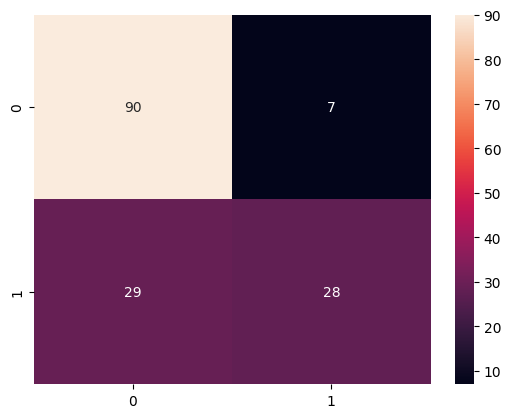

In [ ]:
sns.heatmap(Confusion_matrix_rf_e,annot=True,fmt="d")

TN=Confusion_matrix_rf_e[0,0]
FP=Confusion_matrix_rf_e[0,1]
FN=Confusion_matrix_rf_e[1,0]
TP=Confusion_matrix_rf_e[1,1]

TN,FP,FN,TP

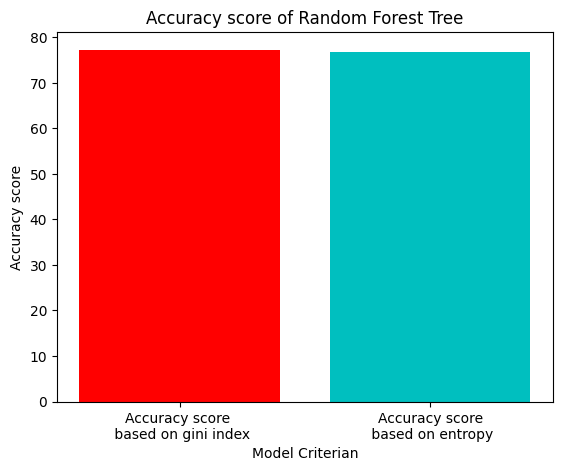

In [ ]:
model=[Accuracy_score_rf_g,Accuracy_score_rf_e]
color_code = ['r','c']
plt.bar(['Accuracy score \n based on gini index','Accuracy score\n based on entropy'],model,color = color_code)
plt.title('Accuracy score of Random Forest Tree')
plt.xlabel('Model Criterian')
plt.ylabel('Accuracy score')
plt.show()

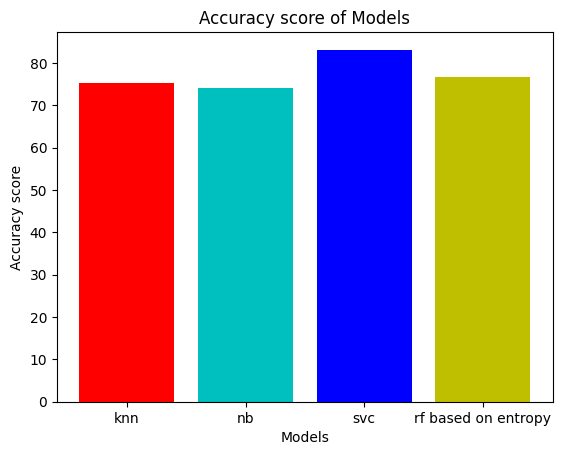

In [ ]:
AC_model=[Accuracy_score_knn,Accuracy_score_nb,Accuracy_score_svc,Accuracy_score_rf_e]
color_code = ['r','c','b','y']
plt.bar(['knn','nb','svc','rf based on entropy'],AC_model,color = color_code)
plt.title('Accuracy score of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.show()


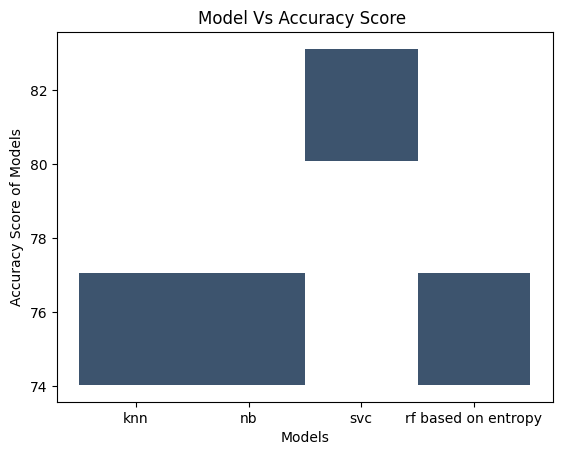

In [ ]:
X_p=['knn','nb','svc','rf based on entropy']
Y_p=[Accuracy_score_knn,Accuracy_score_nb,Accuracy_score_svc,Accuracy_score_rf_e]
sns.histplot(x=X_p,y=Y_p)
plt.xlabel('Models')
plt.ylabel('Accuracy Score of Models')
plt.title("Model Vs Accuracy Score ")
plt.show()

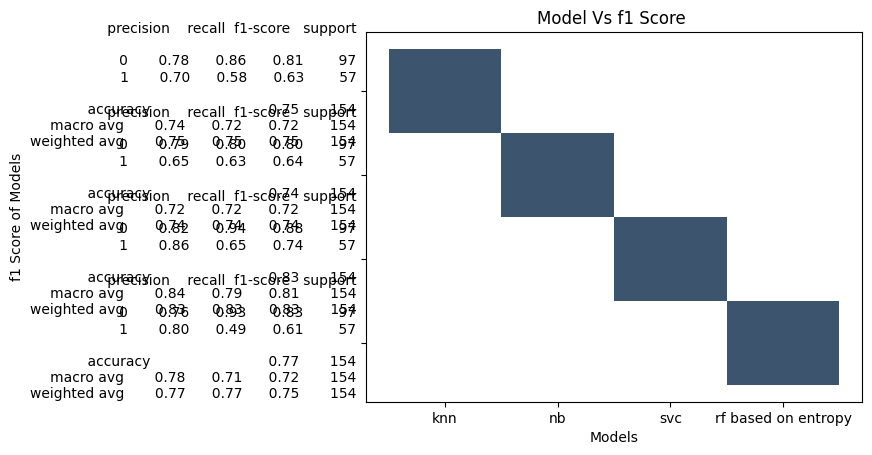

In [ ]:
X_f=['knn','nb','svc','rf based on entropy']
Y_f=[f1_Score_knn,f1_Score_nb,f1_Score_svc,f1_Score_rf_e]
sns.histplot(x=X_f,y=Y_f)
plt.xlabel('Models')
plt.ylabel('f1 Score of Models')
plt.title("Model Vs f1 Score ")
plt.show()

**Conclusion**

Model-1

**K-Nearest Neighbour (KNN)**

Accuracy Score is **75.32467532467533**

f1 Score is **0.75**

Model-2

**Naive Bayes**

Accuracy Score is **74.02597402597402**

f1 Score is **0.74**

Model-3

**Support Vector Classifier**

Accuracy Score is  **83.11688311688312**

f1 Score is **0.83**

Model-4

**Random Forest Classifier**

Accuracy Score based on entropy is **75.97402597402598**

f1 Score is **0.76**

When Comparing all Model's Accuracy Score & f1 Score values

Model-3 has high Accuracy Score Value & f1 Score Value

**Result:-**

Model-3

 **Support Vector Classifier** fits correctly to this dataset

[29]
0s
